In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
from matplotlib.ticker import FormatStrFormatter
plt.rcParams['axes.unicode_minus']=False

In [5]:
width_bot_elec = 150 #nn
width_top_elec = 50 #nm
dist_cruc = 650 #mm
origin_trans = 62.5 #mm  This is the distance by which the origin of the wafer gets translated when tilted, because tilt axis is not in wafer plane
radius_wafer = 50 #mm
heigt_resist_bot = 200 #nm
height_resist_top = 600 #nm
bot_electrode = 35 #nm
top_electrode = 75 #nm
tilt = 7*np.pi/36 # alpha in model in radians 
dist_cruc_actual = abs(dist_cruc*np.cos(tilt) - origin_trans)

x =  np.linspace(-radius_wafer, radius_wafer, num=100)
y =  np.linspace(-radius_wafer, radius_wafer, num=100)

x_surf, y_surf = np.meshgrid(x, y)

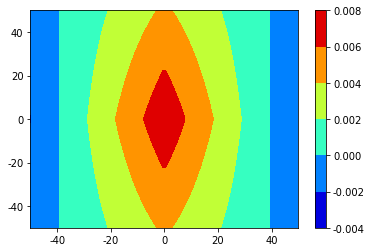

In [6]:
fig, ax = plt.subplots()
area_simple = np.outer((width_bot_elec - height_resist_top*abs(x)/dist_cruc_actual),(width_top_elec  - height_resist_top*abs(y)/dist_cruc_actual))
# print(height_resist_top*theta)
plot = ax.contourf(x_surf,y_surf,area_simple/10**6, 5, cmap='jet')
cbar = fig.colorbar(plot)

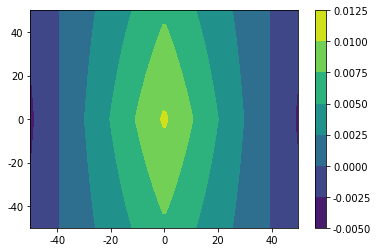

In [7]:
#Tilt Model
# f = np.sqrt( x**2 + dist_cruc_actual**2 - 2*x*dist_cruc_actual*np.cos((tilt+90)))
f = np.sqrt(x**2 + dist_cruc_actual**2 + 2*x*dist_cruc_actual*np.sin(tilt))
gamma = np.arcsin((f**2 + x**2 - dist_cruc_actual**2) / (2*f*x)) # angle subtended between the wafer and plane perpendicular to the incident metal flux  
thick_bot_elec_real = bot_electrode * np.cos(gamma)
# print(thick_bot_elec_real)
area_side = 2*np.multiply(thick_bot_elec_real,(width_top_elec  - height_resist_top*abs(y)/dist_cruc_actual))
area_total = area_simple + area_side
fig, ax = plt.subplots()
plot = ax.contourf(x_surf, y_surf, area_total/10**6, 5)
cbar = fig.colorbar(plot)

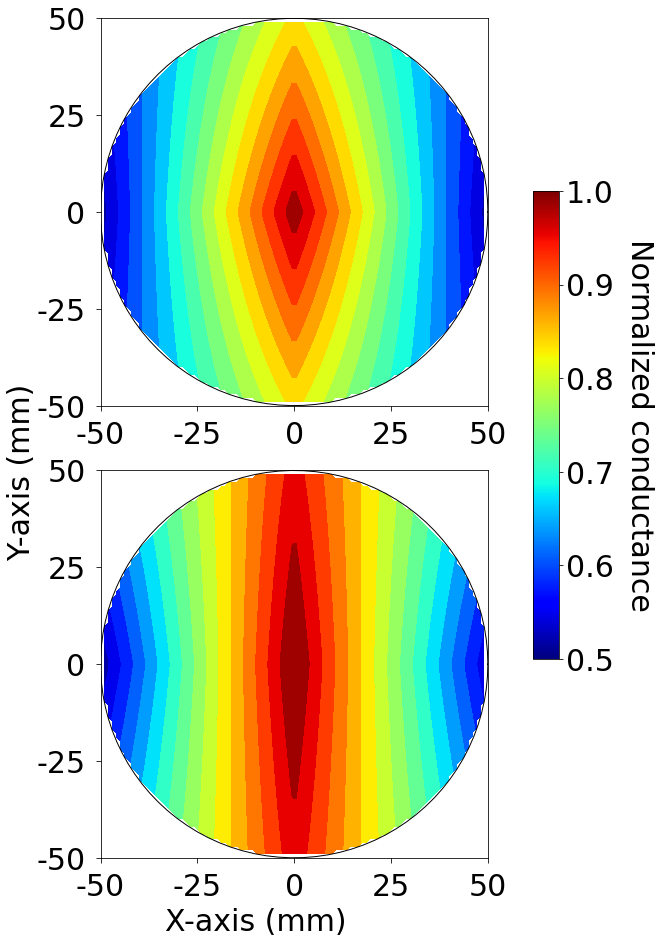

In [9]:
narrow_top = bot_electrode*np.cos(gamma) 
area_width_nt = np.outer((width_bot_elec - height_resist_top*abs(x)/dist_cruc_actual),(width_top_elec  -  narrow_top - height_resist_top*abs(y)/dist_cruc_actual))
area_side = 2*np.outer(thick_bot_elec_real,(width_top_elec  - narrow_top -  height_resist_top*abs(y)/dist_cruc_actual))
area_total = area_width_nt + area_side
distance = np.sqrt((x_surf**2+y_surf**2))
area_simple = np.ma.masked_where(distance > 50, area_simple)
area_total = np.ma.masked_where(distance > 50, area_total)
norm_conductance = 1 # S/nm2
conductance_simple = area_simple*norm_conductance
conductance_total = area_total*norm_conductance
isn1 = np.isnan(conductance_simple)
isn2 = np.isnan(conductance_total)
conductance_simple_dropna = conductance_simple[~isn1]
conductance_total_dropna = conductance_total[~isn2]
# print(np.max(conductance_simple_dropna))
max_norm_conductance_simple = conductance_simple/np.max(conductance_simple_dropna)
max_norm_conductance_total = conductance_total/np.max(conductance_total_dropna)

fig, ax = plt.subplots(2, 1, figsize=(7,13), sharey = True, constrained_layout = True)
simple_plot = ax[0].contourf(x_surf, y_surf, max_norm_conductance_simple, 15, cmap = 'jet')
ax[0].plot(radius_wafer*np.cos(np.linspace(0,2*np.pi,100)),radius_wafer*np.sin(np.linspace(0,2*np.pi,100)),linewidth=1,color='black')
total_plot = ax[1].contourf(x_surf, y_surf, max_norm_conductance_total, 15, cmap = 'jet')
ax[1].plot(radius_wafer*np.cos(np.linspace(0,2*np.pi,100)),radius_wafer*np.sin(np.linspace(0,2*np.pi,100)),linewidth=1,color='black')
ax[0].tick_params(axis='x', labelsize=30, length = 5, pad = 10, colors='k', direction = 'out')
ax[1].tick_params(axis='x', labelsize=30, length = 5, pad = 10, colors='k', direction = 'out')
ax[0].tick_params(axis='y', labelsize=30, length = 5, pad = 10, colors='k', direction = 'out')
ax[1].tick_params(axis='y', labelsize=30, length = 5, pad = 10, colors='k', direction = 'out')
ax[0].set_aspect('equal')
ax[1].set_aspect('equal')
fig.supxlabel('X-axis (mm)', fontsize=30)
fig.supylabel('Y-axis (mm)', fontsize=30)
plt.yticks(np.arange((-radius_wafer), (radius_wafer +1), radius_wafer/2))
vmin, vmax = total_plot.get_clim() # get colorbar limits
cNorm = mpl.colors.Normalize(vmin=0.5, vmax=vmax)
cmap = mpl.cm.jet
ax3 = fig.add_axes([1.05, 0.3, 0.05, 0.5])
cb1 = mpl.colorbar.ColorbarBase(ax3, cmap=cmap, norm=cNorm)
ax3.set_ylabel('Normalized conductance', rotation=270,labelpad=40,fontsize=30) 
ax3.tick_params(labelsize=30)